In [1]:
#IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person's resting blood pressure
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.shape

(303, 14)

In [9]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

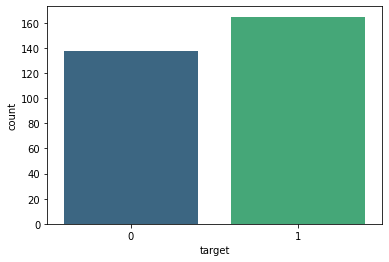

In [10]:
sns.countplot(x='target',data=df,palette='viridis')
plt.show()

In [11]:
NoDiseaseCount = len(df[df.target==0])
DiseaseCount = len(df[df.target==1])

In [12]:
print("Percentage of patients with no heart disease: {:.3f}%".format((NoDiseaseCount / (len(df.target))*100)))
print("Percentage of patients with heart disease: {:.3f}%".format((DiseaseCount / (len(df.target))*100)))

Percentage of patients with no heart disease: 45.545%
Percentage of patients with heart disease: 54.455%


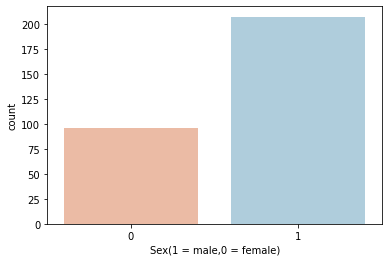

In [13]:
sns.countplot(x='sex',data=df,palette='RdBu')
plt.xlabel("Sex(1 = male,0 = female)")
plt.show()

In [14]:
MaleCount = len(df[df.sex == 1])
FemaleCount = len(df[df.sex == 0])
print("Percentage of Female Patients: {:.3f}%".format((FemaleCount / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.3f}%".format((MaleCount / (len(df.sex))*100)))

Percentage of Female Patients: 31.683%
Percentage of Male Patients: 68.317%


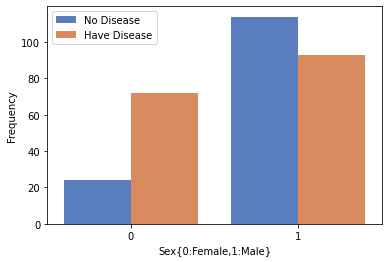

In [15]:
sns.countplot(x='sex',hue='target',data=df,palette="muted")
plt.xlabel('Sex{0:Female,1:Male}')
plt.ylabel('Frequency')
plt.legend(['No Disease','Have Disease'])
plt.show()

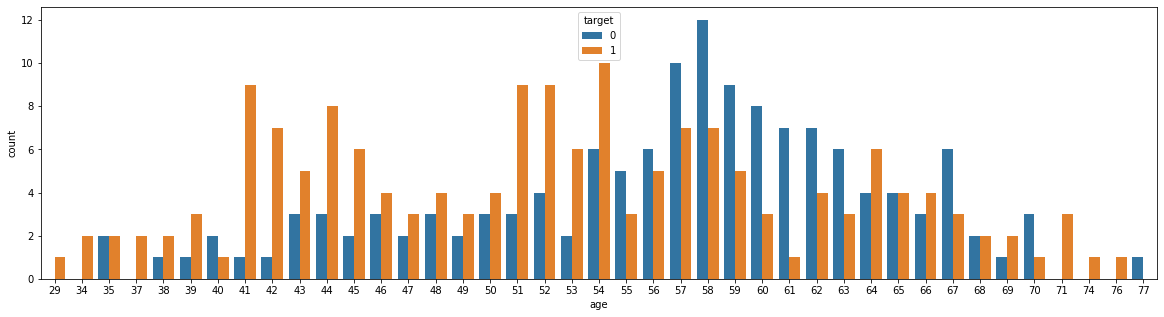

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(x=df.age,hue=df.target)

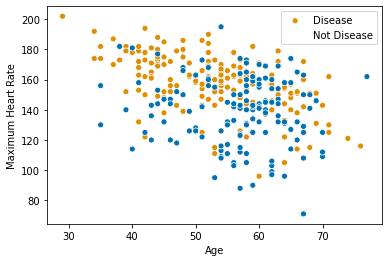

In [17]:
sns.scatterplot(x=df.age,y=df.thalach,hue=df.target,palette='colorblind')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

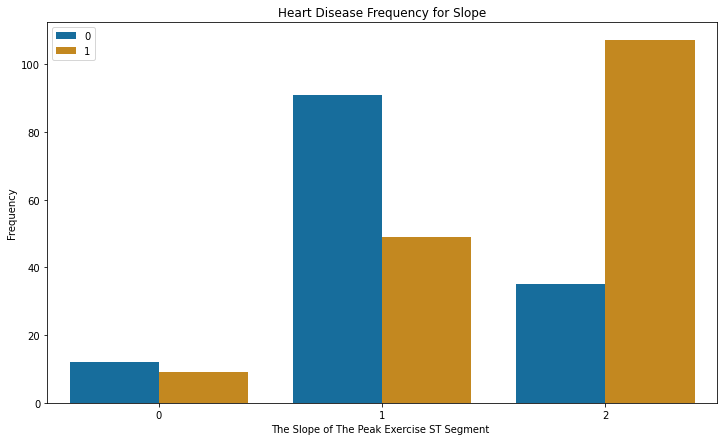

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(x=df.slope,hue=df.target,palette='colorblind')
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.legend()
plt.ylabel('Frequency')
plt.show()

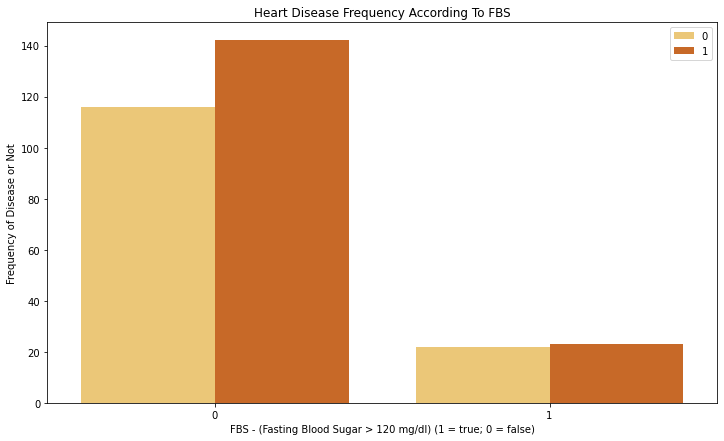

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(x=df.fbs,hue=df.target,palette="YlOrBr")
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.legend()
plt.ylabel('Frequency of Disease or Not')
plt.show()

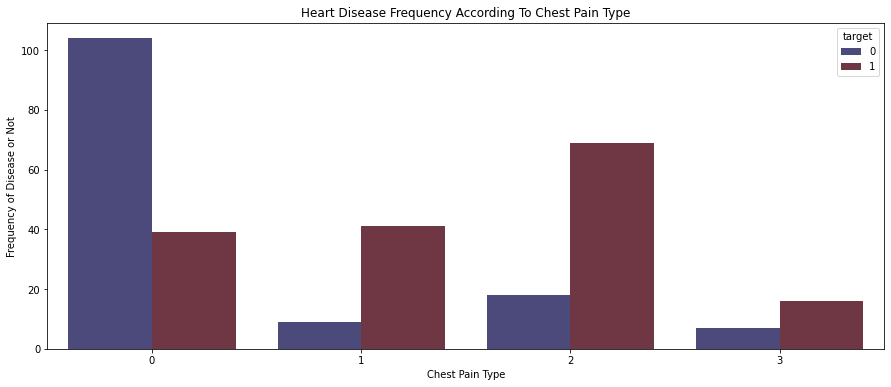

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x = df.cp,hue=df.target,palette='icefire')
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Creating dummy variables for categorical variables

In [22]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [23]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [25]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


## Modeling

In [26]:
x_data = df.drop(['target'],axis = 1)
y = df.target.values

In [27]:
#NORMALIZING
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [28]:
#SPLITTING THE DATA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

## Logistic Regression 

In [29]:
accuracies = {}

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [30]:
pred = LR.predict(x_test)

acc_LR = LR.score(x_test,y_test)*100
accuracies['Logistic Regression'] = acc_LR
print("Test Accuracy {:.2f}%".format(acc_LR))

Test Accuracy 86.89%


In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,pred))
print('*'*100)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

****************************************************************************************************
[[27  2]
 [ 6 26]]


## K-Nearest Neighbour (KNN) Classification

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [34]:
pred = knn.predict(x_test)

acc_knn = knn.score(x_test,y_test)*100
accuracies['K Nearest Neighbors'] = acc_knn
print("Test Accuracy {:.2f}%".format(acc_knn))

Test Accuracy 88.52%


In [35]:
print(classification_report(y_test,pred))
print('*'*100)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        29
           1       0.96      0.81      0.88        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61

****************************************************************************************************
[[28  1]
 [ 6 26]]


Text(0, 0.5, 'Error Rate')

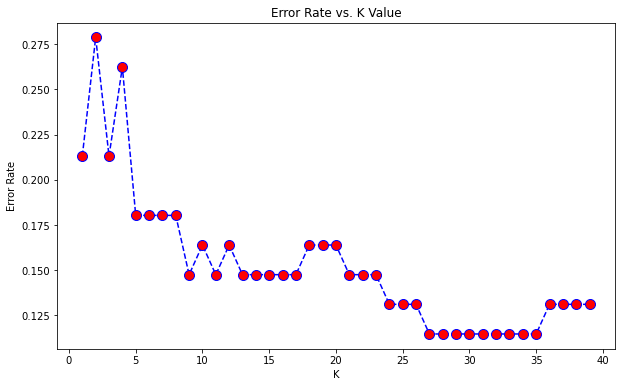

In [36]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Support Vector Machines(SVM)

In [37]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [38]:
pred = svm.predict(x_test)

acc_svm = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc_svm
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc_svm))

Test Accuracy of SVM Algorithm: 86.89%


In [39]:
print(classification_report(y_test,pred))
print('*'*100)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

****************************************************************************************************
[[27  2]
 [ 6 26]]


### Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [41]:
pred = nb.predict(x_test)

acc_nb = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc_nb
print("Accuracy of Naive Bayes: {:.2f}%".format(acc_nb))

Accuracy of Naive Bayes: 60.66%


In [42]:
print(classification_report(y_test,pred))
print('*'*100)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.55      0.93      0.69        29
           1       0.83      0.31      0.45        32

    accuracy                           0.61        61
   macro avg       0.69      0.62      0.57        61
weighted avg       0.70      0.61      0.57        61

****************************************************************************************************
[[27  2]
 [22 10]]


In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
pred = dtc.predict(x_test)

acc_dtc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc_dtc
print("Decision Tree Test Accuracy {:.2f}%".format(acc_dtc))

Decision Tree Test Accuracy 83.61%


In [45]:
print(classification_report(y_test,pred))
print('*'*100)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

****************************************************************************************************
[[24  5]
 [ 5 27]]


In [46]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [47]:
pred = rf.predict(x_test)

acc_rf = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc_rf
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc_rf))

Random Forest Algorithm Accuracy Score : 88.52%


In [48]:
print(classification_report(y_test,pred))
print('*'*100)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

****************************************************************************************************
[[25  4]
 [ 3 29]]


In [51]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN',  
              'Naive Bayes','Decision Tree','Random Forest'],
    'Score': [acc_LR, acc_svm, acc_knn, 
              acc_nb, acc_dtc,acc_rf]})
models.sort_values(by='Score', ascending=True)

,Model,Score
3,Naive Bayes,60.655738
4,Decision Tree,83.606557
0,Logistic Regression,86.885246
1,Support Vector Machines,86.885246
2,KNN,88.524590
5,Random Forest,88.524590
